# Assignment Part I

## Problem Statement

A **US-based housing company** named ***Surprise Housing*** has decided to enter **the Australian market**. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- **Which variables are significant in predicting the price of a house**
- **How well those variables describe the price of a house.**

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Packages for calculations and data preprocessing
import numpy as np
import pandas as pd

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for Regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso

# Added below to supress unwanted warnings related to deprecations etc.
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
# Read input data
house_df = pd.read_csv(r"train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Rows and Columns of the dataset
house_df.shape

(1460, 81)

In [5]:
# Datatypes of variables in the dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Dictionary

**MSSubClass:** Identifies the type of dwelling involved in the sale.

        20: 1-STORY 1946 & NEWER ALL STYLES
        30: 1-STORY 1945 & OLDER
        40: 1-STORY W/FINISHED ATTIC ALL AGES
        45: 1-1/2 STORY - UNFINISHED ALL AGES
        50: 1-1/2 STORY FINISHED ALL AGES
        60: 2-STORY 1946 & NEWER
        70: 2-STORY 1945 & OLDER
        75: 2-1/2 STORY ALL AGES
        80: SPLIT OR MULTI-LEVEL
        85: SPLIT FOYER
        90: DUPLEX - ALL STYLES AND AGES
       120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150: 1-1/2 STORY PUD - ALL AGES
       160: 2-STORY PUD - 1946 & NEWER
       180: PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190: 2 FAMILY CONVERSION - ALL STYLES AND AGES

**MSZoning:** Identifies the general zoning classification of the sale.
		
       A: Agriculture
       C: Commercial
       FV: Floating Village Residential
       I: Industrial
       RH: Residential High Density
       RL: Residential Low Density
       RP: Residential Low Density Park 
       RM: Residential Medium Density
	
**LotFrontage:** Linear feet of street connected to property<br>
**LotArea:** Lot size in square feet<br>
**Street:** Type of road access to property<br>

       Grvl: Gravel	
       Pave: Paved       	

**Alley:** Type of alley access to property

       Grvl: Gravel
       Pave: Paved
       NA: No alley access
		
**LotShape:** General shape of property

       Reg: Regular	
       IR1: Slightly irregular
       IR2: Moderately Irregular
       IR3: Irregular
       
**LandContour:** Flatness of the property

       Lvl: Near Flat/Level	
       Bnk: Banked - Quick and significant rise from street grade to building
       HLS: Hillside - Significant slope from side to side
       Low: Depression
		
**Utilities:** Type of utilities available
		
       AllPub: All public Utilities (E,G,W,& S)	
       NoSewr: Electricity, Gas, and Water (Septic Tank)
       NoSeWa: Electricity and Gas Only
       ELO: Electricity only	
	
**LotConfig:** Lot configuration

       Inside: Inside lot
       Corer: Corner lot
       CulSac: Cul-de-sac
       FR2: Frontage on 2 sides of property
       FR3: Frontage on 3 sides of property
	
**LandSlope:** Slope of property
		
       Gtl: Gentle slope
       Mod: Moderate Slope	
       Sev: Severe Slope
	
**Neighborhood:** Physical locations within Ames city limits

       Blmngtn: Bloomington Heights
       Blueste: Bluestem
       BrDale: Briardale
       BrkSide: Brookside
       ClearCr: Clear Creek
       CollgCr: College Creek
       Crawfor: Crawford
       Edwards: Edwards
       Gilbert: Gilbert
       IDOTRR: Iowa DOT and Rail Road
       MeadowV: Meadow Village
       Mitchel: Mitchell
       Names: North Ames
       NoRidge: Northridge
       NPkVill: Northpark Villa
       NridgHt: Northridge Heights
       NWAmes: Northwest Ames
       OldTown: Old Town
       SWISU: South & West of Iowa State University
       Sawyer: Sawyer
       SawyerW: Sawyer West
       Somerst: Somerset
       StoneBr: Stone Brook
       Timber: Timberland
       Veenker: Veenker
			
**Condition1:** Proximity to various conditions
	
       Artery: Adjacent to arterial street
       Feedr: Adjacent to feeder street	
       Norm: Normal	
       RRNn: Within 200' of North-South Railroad
       RRAn: Adjacent to North-South Railroad
       PosN: Near positive off-site feature--park, greenbelt, etc.
       PosA: Adjacent to postive off-site feature
       RRNe: Within 200' of East-West Railroad
       RRAe: Adjacent to East-West Railroad
	
**Condition2:** Proximity to various conditions (if more than one is present)
		
       Artery: Adjacent to arterial street
       Feedr: Adjacent to feeder street	
       Norm: Normal	
       RRNn: Within 200' of North-South Railroad
       RRAn: Adjacent to North-South Railroad
       PosN: Near positive off-site feature--park, greenbelt, etc.
       PosA: Adjacent to postive off-site feature
       RRNe: Within 200' of East-West Railroad
       RRAe: Adjacent to East-West Railroad
	
**BldgType:** Type of dwelling
		
       1Fam: Single-family Detached	
       2FmCon: Two-family Conversion; originally built as one-family dwelling
       Duplx: Duplex
       TwnhsE: Townhouse End Unit
       TwnhsI: Townhouse Inside Unit
	
**HouseStyle:** Style of dwelling
	
       1Story: One story
       1.5Fin: One and one-half story: 2nd level finished
       1.5Unf: One and one-half story: 2nd level unfinished
       2Story: Two story
       2.5Fin: Two and one-half story: 2nd level finished
       2.5Unf: Two and one-half story: 2nd level unfinished
       SFoyer: Split Foyer
       SLvl: Split Level
	
**OverallQual:** Rates the overall material and finish of the house

       10: Very Excellent
       9: Excellent
       8: Very Good
       7: Good
       6: Above Average
       5: Average
       4: Below Average
       3: Fair
       2: Poor
       1: Very Poor
	
**OverallCond:** Rates the overall condition of the house

       10: Very Excellent
       9: Excellent
       8: Very Good
       7: Good
       6: Above Average	
       5: Average
       4: Below Average	
       3: Fair
       2: Poor
       1: Very Poor
		
**YearBuilt:** Original construction date<br>
**YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)<br>
**RoofStyle:** Type of roof<br>

       Flat: Flat
       Gable: Gable
       Gambrel: Gabrel (Barn)
       Hip: Hip
       Mansard: Mansard
       Shed: Shed
		
**RoofMatl:** Roof material

       ClyTile: Clay or Tile
       CompShg: Standard (Composite) Shingle
       Membran: Membrane
       Metal: Metal
       Roll: Roll
       Tar&Grv: Gravel & Tar
       WdShake: Wood Shakes
       WdShngl: Wood Shingles
		
**Exterior1st:** Exterior covering on house

       AsbShng: Asbestos Shingles
       AsphShn: Asphalt Shingles
       BrkComm: Brick Common
       BrkFace: Brick Face
       CBlock: Cinder Block
       CemntBd: Cement Board
       HdBoard: Hard Board
       ImStucc: Imitation Stucco
       MetalSd: Metal Siding
       Other: Other
       Plywood: Plywood
       PreCast: PreCast	
       Stone: Stone
       Stucco: Stucco
       VinylSd: Vinyl Siding
       Wd Sdng: Wood Siding
       WdShing: Wood Shingles
	
**Exterior2nd:** Exterior covering on house (if more than one material)

       AsbShng: Asbestos Shingles
       AsphShn: Asphalt Shingles
       BrkComm: Brick Common
       BrkFace: Brick Face
       CBlock: Cinder Block
       CemntBd: Cement Board
       HdBoard: Hard Board
       ImStucc: Imitation Stucco
       MetalSd: Metal Siding
       Other: Other
       Plywood: Plywood
       PreCast: PreCast
       Stone: Stone
       Stucco: Stucco
       VinylSd: Vinyl Siding
       Wd Sdng: Wood Siding
       WdShing: Wood Shingles
	
**MasVnrType:** Masonry veneer type

       BrkCmn: Brick Common
       BrkFace: Brick Face
       CBlock: Cinder Block
       None: None
       Stone: Stone
	
**MasVnrArea:** Masonry veneer area in square feet

**ExterQual:** Evaluates the quality of the material on the exterior
		
       Ex: Excellent
       Gd: Good
       TA: Average/Typical
       Fa: Fair
       Po: Poor
		
**ExterCond:** Evaluates the present condition of the material on the exterior
		
       Ex: Excellent
       Gd: Good
       TA: Average/Typical
       Fa: Fair
       Po: Poor
		
**Foundation:** Type of foundation
		
       BrkTil: Brick & Tile
       CBlock: Cinder Block
       PConc: Poured Contrete	
       Slab: Slab
       Stone: Stone
       Wood: Wood
		
**BsmtQual:** Evaluates the height of the basement

       Ex: Excellent (100+ inches)	
       Gd: Good (90-99 inches)
       TA: Typical (80-89 inches)
       Fa: Fair (70-79 inches)
       Po: Poor (<70 inches
       NA: No Basement
		
**BsmtCond:** Evaluates the general condition of the basement

       Ex: Excellent
       Gd: Good
       TA: Typical - slight dampness allowed
       Fa: Fair - dampness or some cracking or settling
       Po: Poor - Severe cracking, settling, or wetness
       NA: No Basement
	
**BsmtExposure:** Refers to walkout or garden level walls

       Gd: Good Exposure
       Av: Average Exposure (split levels or foyers typically score average or above)	
       Mn: Mimimum Exposure
       No: No Exposure
       NA: No Basement
	
**BsmtFinType1:** Rating of basement finished area

       GLQ: Good Living Quarters
       ALQ: Average Living Quarters
       BLQ: Below Average Living Quarters	
       Rec: Average Rec Room
       LwQ: Low Quality
       Unf: Unfinshed
       NA: No Basement
		
**BsmtFinSF1:** Type 1 finished square feet

**BsmtFinType2:** Rating of basement finished area (if multiple types)

       GLQ: Good Living Quarters
       ALQ: Average Living Quarters
       BLQ: Below Average Living Quarters	
       Rec: Average Rec Room
       LwQ: Low Quality
       Unf: Unfinshed
       NA: No Basement

**BsmtFinSF2:** Type 2 finished square feet<br>
**BsmtUnfSF:** Unfinished square feet of basement area<br>
**TotalBsmtSF:** Total square feet of basement area<br>

**Heating:** Type of heating
		
       Floor: Floor Furnace
       GasA: Gas forced warm air furnace
       GasW: Gas hot water or steam heat
       Grav: Gravity furnace	
       OthW: Hot water or steam heat other than gas
       Wall: Wall furnace
		
**HeatingQC:** Heating quality and condition

       Ex: Excellent
       Gd: Good
       TA: Average/Typical
       Fa: Fair
       Po: Poor
		
**CentralAir:** Central air conditioning

       N: No
       Y: Yes
		
**Electrical:** Electrical system

       SBrkr: Standard Circuit Breakers & Romex
       Fuse: Fuse Box over 60 AMP and all Romex wiring (Average)	
       Fuse: 60 AMP Fuse Box and mostly Romex wiring (Fair)
       Fuse: 60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix: Mixed
		
**1stFlrSF:** First Floor square feet<br>
**2ndFlrSF:** Second floor square feet<br>
**LowQualFinSF:** Low quality finished square feet (all floors)<br>
**GrLivArea:** Above grade (ground) living area square feet<br>
**BsmtFullBath:** Basement full bathrooms<br>
**BsmtHalfBath:** Basement half bathrooms<br>
**FullBath:** Full bathrooms above grade<br>
**HalfBath:** Half baths above grade<br>
**Bedroom:** Bedrooms above grade (does NOT include basement bedrooms)<br>
**Kitchen:** Kitchens above grade<br>

**KitchenQual:** Kitchen quality

       Ex: Excellent
       Gd: Good
       TA: Typical/Average
       Fa: Fair
       Po: Poor
       	
**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

**Functional:** Home functionality (Assume typical unless deductions are warranted)

       Typ: Typical Functionality
       Min1: Minor Deductions 1
       Min2: Minor Deductions 2
       Mod: Moderate Deductions
       Maj1: Major Deductions 1
       Maj2:Major Deductions 2
       Sev: Severely Damaged
       Sal: Salvage only
		
**Fireplaces:** Number of fireplaces

**FireplaceQu:** Fireplace quality

       Ex: Excellent - Exceptional Masonry Fireplace
       Gd: Good - Masonry Fireplace in main level
       TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa: Fair - Prefabricated Fireplace in basement
       Po: Poor - Ben Franklin Stove
       NA: No Fireplace
		
**GarageType:** Garage location
		
       2Types: More than one type of garage
       Attchd: Attached to home
       Basment: Basement Garage
       BuiltIn: Built-In (Garage part of house - typically has room above garage)
       CarPort: Car Port
       Detchd: Detached from home
       NA: No Garage
		
**GarageYrBlt:** Year garage was built
		
**GarageFinish:** Interior finish of the garage

       Fin: Finished
       RFn: Rough Finished	
       Unf: Unfinished
       NA:  No Garage
		
**GarageCars:** Size of garage in car capacity<br>
**GarageArea:** Size of garage in square feet<br>

**GarageQual:** Garage quality

       Ex: Excellent
       Gd: Good
       TA: Typical/Average
       Fa: Fair
       Po: Poor
       NA: No Garage
		
**GarageCond:** Garage condition

       Ex: Excellent
       Gd: Good
       TA: Typical/Average
       Fa: Fair
       Po: Poor
       NA: No Garage
		
**PavedDrive:** Paved driveway

       Y: Paved 
       P: Partial Pavement
       N: Dirt/Gravel
		
**WoodDeckSF:** Wood deck area in square feet<br>
**OpenPorchSF:** Open porch area in square feet<br>
**EnclosedPorch:** Enclosed porch area in square feet<br>
**3SsnPorch:** Three season porch area in square feet<br>
**ScreenPorch:** Screen porch area in square feet<br>
**PoolArea:** Pool area in square feet<br>

**PoolQC:** Pool quality
		
       Ex: Excellent
       Gd: Good
       TA: Average/Typical
       Fa: Fair
       NA: No Pool
		
**Fence:** Fence quality
		
       GdPrv: Good Privacy
       MnPrv: Minimum Privacy
       GdWo: Good Wood
       MnWw: Minimum Wood/Wire
       NA: No Fence
	
**MiscFeature:** Miscellaneous feature not covered in other categories
		
       Elev: Elevator
       Gar2: 2nd Garage (if not described in garage section)
       Othr: Other
       Shed: Shed (over 100 SF)
       TenC: Tennis Court
       NA: None
		
**MiscVal:** Dollar Value of miscellaneous feature<br>
**MoSold:** Month Sold (MM)<br>
**YrSold:** Year Sold (YYYY)<br>

**SaleType:** Type of sale
		
       WD : Warranty Deed - Conventional
       CWD: Warranty Deed - Cash
       VWD: Warranty Deed - VA Loan
       New: Home just constructed and sold
       COD: Court Officer Deed/Estate
       Con: Contract 15% Down payment regular terms
       ConLw: Contract Low Down payment and low interest
       ConLI: Contract Low Interest
       ConLD: Contract Low Down
       Oth: Other

**SaleCondition:** Condition of sale

       Normal: Normal Sale
       Abnorml: Abnormal Sale -  trade, foreclosure, short sale
       AdjLand: Adjoining Land Purchase
       Alloca: Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family: Sale between family members
       Partial: Home was not completed when last assessed (associated with New Homes)

### Data Understanding, Cleaning and Pre-processing

In [6]:
# The Id column is just an index so it has to be dropped and it will not play any role in the model.
house_df_1 = house_df.copy().drop(["Id"], axis=1)
house_df_1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# Check for duplicate rows
len(house_df_1[house_df_1.duplicated()])

0

#### There're no duplicate rows in the dataset

#### Variable dtype conversion and mapping values as per data dictionary

In [8]:
# Create a copy of house_df_1 dataset to map variables
house_df_2 = house_df_1.copy()

In [9]:
# In the dataset MSSubClass mentioned as integer but it is of object type. Thus converting it accordingly.
house_df_2['MSSubClass'] = house_df_1['MSSubClass'].astype('object')

In [10]:
# Mapping MoSold variable
month_dictionary = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10:"Oct",
    11:"Nov",
    12:"Dec"
}
house_df_2.MoSold = house_df_1.MoSold.map(month_dictionary)

# High level Assertion check for mapping
np.testing.assert_array_equal(
    house_df_1.MoSold.value_counts(dropna=False).values,
    house_df_2.MoSold.value_counts(dropna=False).values
)

# Mapping check
print("Values before mapping \n\n", house_df_1.MoSold.value_counts(dropna=False))
print()
print("Values after mapping \n\n", house_df_2.MoSold.value_counts(dropna=False))

Values before mapping 

 MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

Values after mapping 

 MoSold
Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: count, dtype: int64


In [11]:
# Mapping c variable
quality_dictionary = {
    10:'Very Excellent',
    9:'Excellent',
    8:'Very Good',
    7:'Good',
    6:'Above Average',
    5:'Average',
    4:'Below Average',
    3:'Fair',
    2:'Poor',
    1:'Very Poor'
}
house_df_2.OverallCond = house_df_1.OverallCond.map(quality_dictionary)

# High level Assertion check for mapping
np.testing.assert_array_equal(
    house_df_1.OverallCond.value_counts(dropna=False).values,
    house_df_2.OverallCond.value_counts(dropna=False).values
)

# Mapping check
print("Values before mapping \n\n", house_df_1.OverallCond.value_counts(dropna=False))
print()
print("Values after mapping \n\n", house_df_2.OverallCond.value_counts(dropna=False))

Values before mapping 

 OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

Values after mapping 

 OverallCond
Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: count, dtype: int64


In [12]:
# Mapping OverallQual variable
house_df_2.OverallQual = house_df_1.OverallQual.map(quality_dictionary)

# High level Assertion check for mapping
np.testing.assert_array_equal(
    house_df_1.OverallQual.value_counts(dropna=False).values,
    house_df_2.OverallQual.value_counts(dropna=False).values
)

# Mapping check
print("Values before mapping \n\n", house_df_1.OverallQual.value_counts(dropna=False))
print()
print("Values after mapping \n\n", house_df_2.OverallQual.value_counts(dropna=False))

Values before mapping 

 OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

Values after mapping 

 OverallQual
Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: count, dtype: int64


In [13]:
# Check for missing values
missing_values = round(100*(house_df_2.isnull().sum()/len(house_df_2)), 2).sort_values(ascending=False)
print(missing_values)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

#### Since there're a lot of missing values in some columns, missing value treatment is required.

#### From a understanding of the dataset and percenatge of missing values from above, dropped the following columns
***PoolQC, MiscFeature, Alley, Fence, FireplaceQu*** have a majority of missing values. Thus removing these variables to avoid skewness of data.

In [14]:
# Drop columns 'PoolQC', 'MiscFeature', 'Alley', 'Fence' & 'FireplaceQu'
house_df_2 = house_df_2.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
house_df_2.shape

(1460, 75)

#### Missing Value Imputation

As per the basic understanding of data and meaning from data dictionary, the nulls in the variables ***"BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual", "GarageCond", "GarageFinish", "GarageQual", "GarageType", "MasVnrType"*** have significant meaning thus we're replacing them with None.

In [15]:
# Replace missing with None in the following columns

nan_col_list = [
    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual",
    "GarageCond", "GarageFinish", "GarageQual", "GarageType", "MasVnrType"
]
for nan_col in nan_col_list:    
    house_df_2[nan_col] = house_df_2[nan_col].fillna(value="None")

In [16]:
### Assessing the continuous variables
house_df_2[sorted(house_df_2)].describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,0.613014,1.565068,472.980137,1.767123,1978.506164,1515.463699,0.382877,1.046575,10516.828082,70.049958,5.844521,103.685262,43.489041,46.660274,2.758904,180921.195890,15.060959,6.517808,1057.429452,94.244521,1971.267808,1984.865753,2007.815753
std,386.587738,436.528436,29.317331,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,0.644666,0.550916,213.804841,0.747315,24.689725,525.480383,0.502885,0.220338,9981.264932,24.284752,48.623081,181.066207,496.123024,66.256028,40.177307,79442.502883,55.757415,1.625393,438.705324,125.338794,30.202904,20.645407,1.328095
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,0.000000,0.000000,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,0.000000,1.000000,334.500000,1.000000,1961.000000,1129.500000,0.000000,1.000000,7553.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,0.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,2007.000000
50%,1087.000000,0.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,1.000000,2.000000,480.000000,2.000000,1980.000000,1464.000000,0.000000,1.000000,9478.500000,69.000000,0.000000,0.000000,0.000000,25.000000,0.000000,163000.000000,0.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,2008.000000
75%,1391.250000,728.000000,0.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1776.750000,1.000000,1.000000,11601.500000,80.000000,0.000000,166.000000,0.000000,68.000000,0.000000,214000.000000,0.000000,7.000000,1298.250000,168.000000,2000.000000,2004.000000,2009.000000
max,4692.000000,2065.000000,508.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,3.000000,3.000000,1418.000000,4.000000,2010.000000,5642.000000,2.000000,3.000000,215245.000000,313.000000,572.000000,1600.000000,15500.000000,547.000000,738.000000,755000.000000,480.000000,14.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000


In [17]:
# Replacing values of below variables with median
impute_median_cols = ["LotFrontage","MasVnrArea","GarageYrBlt"]
house_df_2[impute_median_cols] = house_df_2[impute_median_cols].fillna(house_df_2[impute_median_cols].median())

In [18]:
# Replacing values of below categorical variables with mode
impute_mode_cols = ["BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual", "Electrical", "GarageCond", "GarageFinish", "GarageQual", "GarageType", "MasVnrType"]
for mode_col in impute_mode_cols:
    house_df_2[mode_col] = house_df_2[mode_col].fillna(house_df_2[mode_col].mode().values[0])

In [19]:
# Checking whether there are any remaining missing values in the columns after the imputation process
house_df_2.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

**From the above output it's clear missing value treatment is completed.**

#### Deriving Columns to enhance model development process and reduce redundant analysis. The derived columns attributes will be dropped after it.

In [20]:
# Deriving total area in square feet
house_df_2["Total_sqft"] = house_df_2["BsmtFinSF1"] + house_df_2["BsmtFinSF2"] + house_df_2["1stFlrSF"] + house_df_2["2ndFlrSF"]
house_df_2.drop(["BsmtFinSF1", "BsmtFinSF2", "1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [21]:
# Deriving total number of bathrooms
house_df_2["Total_Bathrooms"] = house_df_2["FullBath"] + 0.5 * house_df_2["HalfBath"] + house_df_2["BsmtFullBath"] + 0.5 * house_df_2["BsmtHalfBath"]
house_df_2.drop(["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"], axis=1, inplace=True)

In [22]:
# Deriving total porch area
house_df_2["Total_Porch_sqft"] = house_df_2["OpenPorchSF"] + house_df_2["3SsnPorch"] + house_df_2["EnclosedPorch"] + house_df_2["ScreenPorch"] + house_df_2["WoodDeckSF"]
house_df_2.drop(["OpenPorchSF", "3SsnPorch", "EnclosedPorch", "ScreenPorch", "WoodDeckSF"], axis=1, inplace=True)

In [23]:
# Deriving property life
house_df_2["Property_life"] = house_df_2["YearRemodAdd"] - house_df_2["YearBuilt"]
house_df_2.drop(["YearRemodAdd", "YearBuilt"], axis=1, inplace=True)

In [24]:
house_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   LotShape          1460 non-null   object 
 6   LandContour       1460 non-null   object 
 7   Utilities         1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   object 
 16  OverallCond       1460 non-null   object 


### Exploratory Data Analysis

#### Univariate Analysis

In [25]:
continuous_variables = sorted(house_df_2.select_dtypes(include = ['int64', 'float64']).columns)
continuous_variables = house_df_2.select_dtypes(include = ['int64', 'float64']).columns
print(f"Continuous variables : {continuous_variables}")
print()
print(f"Total Continuous variables : {len(continuous_variables)}")

Continuous variables : Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'PoolArea', 'MiscVal', 'YrSold', 'SalePrice', 'Total_sqft',
       'Total_Bathrooms', 'Total_Porch_sqft', 'Property_life'],
      dtype='object')

Total Continuous variables : 22


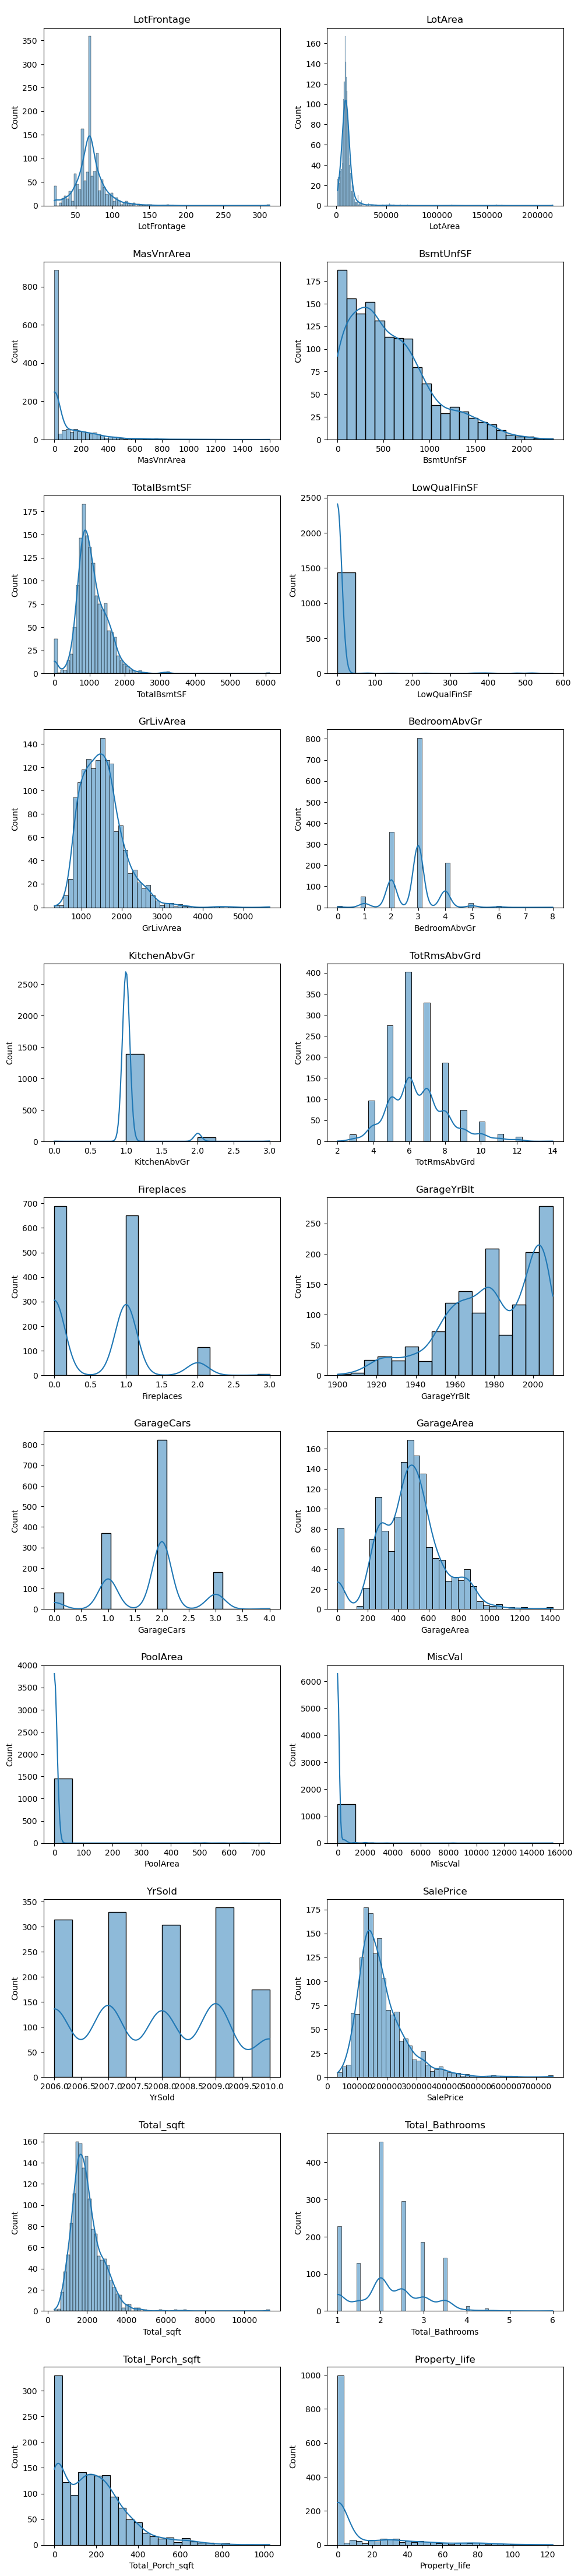

In [26]:
# Continuous Variables
fig_cols = len(continuous_variables)
fig_rows = len(continuous_variables) + 1 // 2

plt.figure(figsize=(10, 4 * fig_rows))
sub_fig = 0

for continuous_variable in continuous_variables:
    if sub_fig < fig_cols:
        sub_fig += 1
        plt.subplot(fig_rows, 2, sub_fig)
        plt.title(f"\n{continuous_variable}")
        
    sns.histplot(house_df_2[continuous_variable], kde = True)

plt.tight_layout()
plt.show()

The variables ***"LowQualFinSF", "KitchenAbvGr", "MiscVal", "PoolArea"*** have **single value** thus will drop them as they'll not play any significant to the model

In [27]:
categorical_variables = sorted(house_df_2.select_dtypes(include = ['object']).columns)
categorical_variables = house_df_2.select_dtypes(include = ['object']).columns
print(f"Categorical_variables : {categorical_variables}")
print()
print(f"Total Categorical_variables : {len(categorical_variables)}")

Categorical_variables : Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

Total Categorical_variables : 42


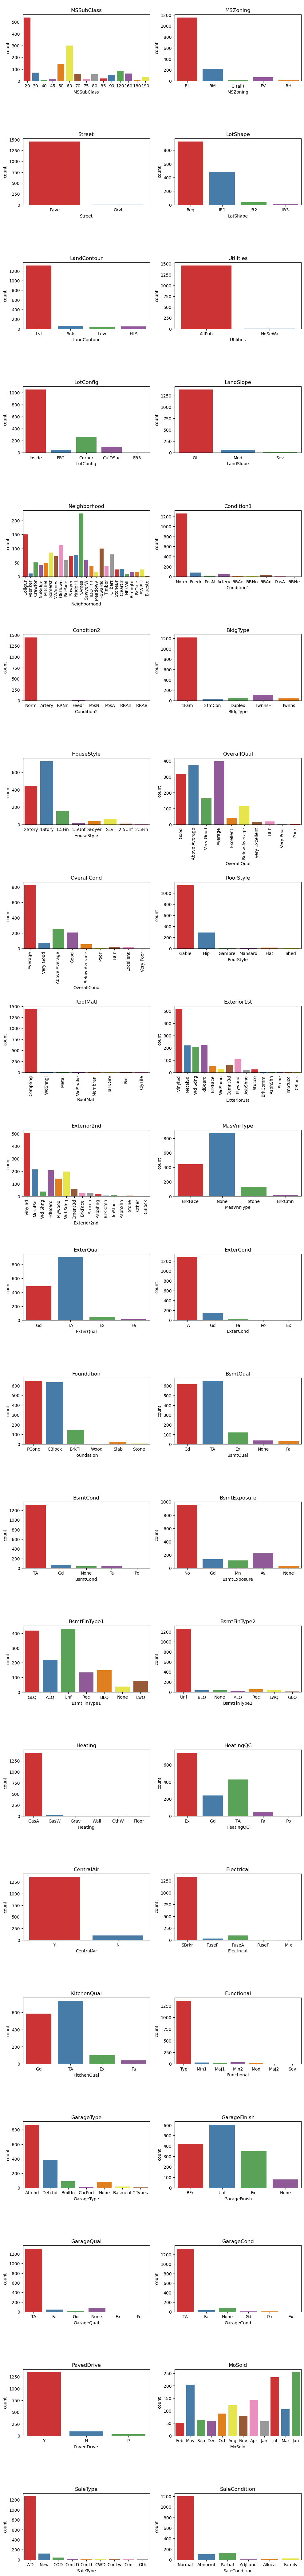

In [28]:
# Categorical Variables
categorical_plot_config_dict = {
    "Neighborhood": {"rotation": 90},
    "Exterior1st": {"rotation": 90},
    "Exterior2nd": {"rotation": 90},
    "OverallCond": {"rotation": 90},
    "OverallQual": {"rotation": 90},
    "Neighborhood": {"rotation": 90},
    "RoofMatl": {"rotation": 90}
}

fig_cols = len(categorical_variables)
fig_rows = len(categorical_variables) + 1 // 2

plt.figure(figsize=(10, 4 * fig_rows))
sub_fig = 0

for categorical_variable in categorical_variables:
    sub_fig += 1
    plt.subplot(fig_rows, 2, sub_fig)
    plt.title(f"\n{categorical_variable}")
        
    sns.countplot(x = house_df_2[categorical_variable], palette = "Set1")
    if str(categorical_variable) in list(categorical_plot_config_dict.keys()):
        plt.xticks(rotation=categorical_plot_config_dict[categorical_variable]["rotation"])

plt.tight_layout()
plt.show()

#### Observations as per Univariate Analysis
**The Dependent / Target Variable SalePrice is highly Skewed so we'll need to transform it. This is done in the upcoming steps.** <br>
**Many Variables are non-normally distributed.** <br>
**Most house conditions have average quality.** <br>
**Most houses offer attached garages.** <br>
**Based upon the above analysis outlier treatment is required.** <br>
**The variables ***"LowQualFinSF", "KitchenAbvGr", "MiscVal", "PoolArea"*** have **single value** thus will drop them as they'll not play any significant to the model.** <br>
**The variables ***"Condition2", "Heating", "Utilities", "Street"*** have majorly low variance and have majorly one type of value. Thus removing them.**

In [29]:
# As per the above analysis droppping the following variables
single_value_columns = ["LowQualFinSF","KitchenAbvGr","MiscVal","PoolArea"]
house_df_2 = house_df_2.drop(single_value_columns, axis=1)

In [30]:
# Updating Continuous variables list
continuous_variables = list(set(continuous_variables) - set(single_value_columns))
len(continuous_variables)

18

In [31]:
# As per the above analysis droppping the following variables
low_variance_columns = ["Condition2", "Heating", "Utilities", "Street"]
house_df_2 = house_df_2.drop(low_variance_columns, axis=1)

In [32]:
# Updating Categorical variables list
categorical_variables = list(set(categorical_variables) - set(low_variance_columns))
len(categorical_variables)

38

#### Outlier Treatment

In [33]:
house_df_2.describe(percentiles = [.05, .25, .50, .75, .90, .95])

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice,Total_sqft,Total_Bathrooms,Total_Porch_sqft,Property_life
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,567.240411,1057.429452,1515.463699,2.866438,6.517808,0.613014,1978.589041,1.767123,472.980137,2007.815753,180921.195890,1999.808219,2.210616,181.329452,13.597945
std,22.027677,9981.264932,180.731373,441.866955,438.705324,525.480383,0.815778,1.625393,0.644666,23.997022,0.747315,213.804841,1.328095,79442.502883,773.992942,0.785399,156.656097,24.476465
min,21.000000,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,2006.000000,34900.000000,334.000000,1.000000,0.000000,0.000000
5%,35.950000,3311.700000,0.000000,0.000000,519.300000,848.000000,2.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,2006.000000,88000.000000,1015.850000,1.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,223.000000,795.750000,1129.500000,2.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,2007.000000,129975.000000,1493.000000,2.000000,45.000000,0.000000
50%,69.000000,9478.500000,0.000000,477.500000,991.500000,1464.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,2008.000000,163000.000000,1863.500000,2.000000,164.000000,0.000000
75%,79.000000,11601.500000,164.250000,808.000000,1298.250000,1776.750000,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,2009.000000,214000.000000,2383.500000,2.500000,266.000000,20.000000
90%,92.000000,14381.700000,335.000000,1232.000000,1602.200000,2158.300000,4.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,2010.000000,278000.000000,3023.100000,3.500000,382.000000,51.000000
95%,104.000000,17401.150000,456.000000,1468.000000,1753.000000,2466.100000,4.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,2010.000000,326100.000000,3334.150000,3.500000,472.150000,73.000000


In [34]:
# Removing outlier values by dropping values beyond .05 and 0.95 percentiles

# Extracting numerical columns
num_cols = house_df_2.select_dtypes(include = ['int64', 'float64']).columns

# Calculating Inter-Quartile Range (IQR)
quartile1 = house_df_2[num_cols].quantile(0.05)
quartile3 = house_df_2[num_cols].quantile(0.95)
iqr = quartile3 - quartile1

# Calculating lower bound and upper bound for required range of values
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile3 + 1.5 * iqr

are_values_lt = house_df_2[num_cols] < lower_bound
are_values_gt = house_df_2[num_cols] > upper_bound
required_values = ~(are_values_lt | are_values_gt).any(axis=1)

house_df_2 = house_df_2[required_values].reset_index(drop=True)

In [35]:
house_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1439 non-null   object 
 1   MSZoning          1439 non-null   object 
 2   LotFrontage       1439 non-null   float64
 3   LotArea           1439 non-null   int64  
 4   LotShape          1439 non-null   object 
 5   LandContour       1439 non-null   object 
 6   LotConfig         1439 non-null   object 
 7   LandSlope         1439 non-null   object 
 8   Neighborhood      1439 non-null   object 
 9   Condition1        1439 non-null   object 
 10  BldgType          1439 non-null   object 
 11  HouseStyle        1439 non-null   object 
 12  OverallQual       1439 non-null   object 
 13  OverallCond       1439 non-null   object 
 14  RoofStyle         1439 non-null   object 
 15  RoofMatl          1439 non-null   object 
 16  Exterior1st       1439 non-null   object 


#### Analysis of SalePrice (Dependent / Target Variable)
As we saw earlier that SalePrice is skewed so we need to remove the skewness else model predictions won't be accurate

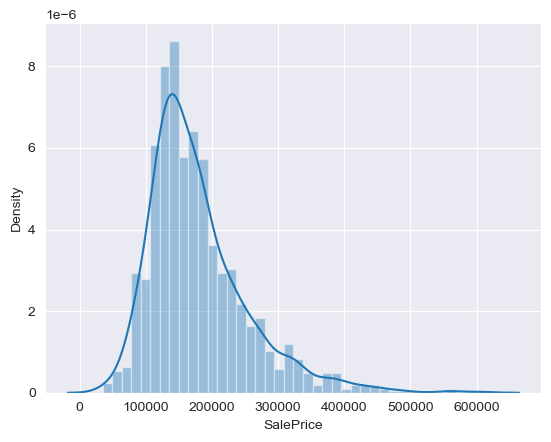

In [36]:
sns.set_style('darkgrid')
sns.distplot(house_df_2['SalePrice'])
plt.show()

In [37]:
## Check the skewness and kurtosis of target variable
print(house_df_2['SalePrice'].skew())
print(house_df_2['SalePrice'].kurt())

1.4939805903608732
3.4539743901776188


In [38]:
## Log transforming the target variable Saleprice to bring skewness less than 1
house_df_2['SalePrice'] = np.log(house_df_2['SalePrice'])

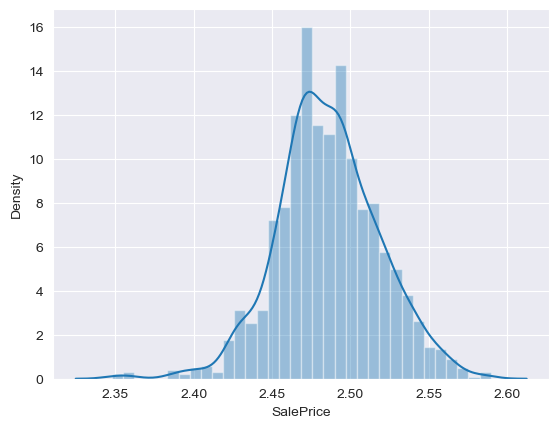

In [39]:
sns.distplot(np.log(house_df_2['SalePrice']))
plt.show()

In [40]:
## Check the skewness and kurtosis of target variable after transformation
print(house_df_2['SalePrice'].skew())
print(house_df_2['SalePrice'].kurt())

0.04200182256188223
0.6616253710595754


**From the above plot we see that the SalePrice is now a Normally Distributed Curve.**

#### Bi-Variate Analysis
Analysis of Target Variable ***SalePrice*** with other Dependent Variables

#### Continuous Variables

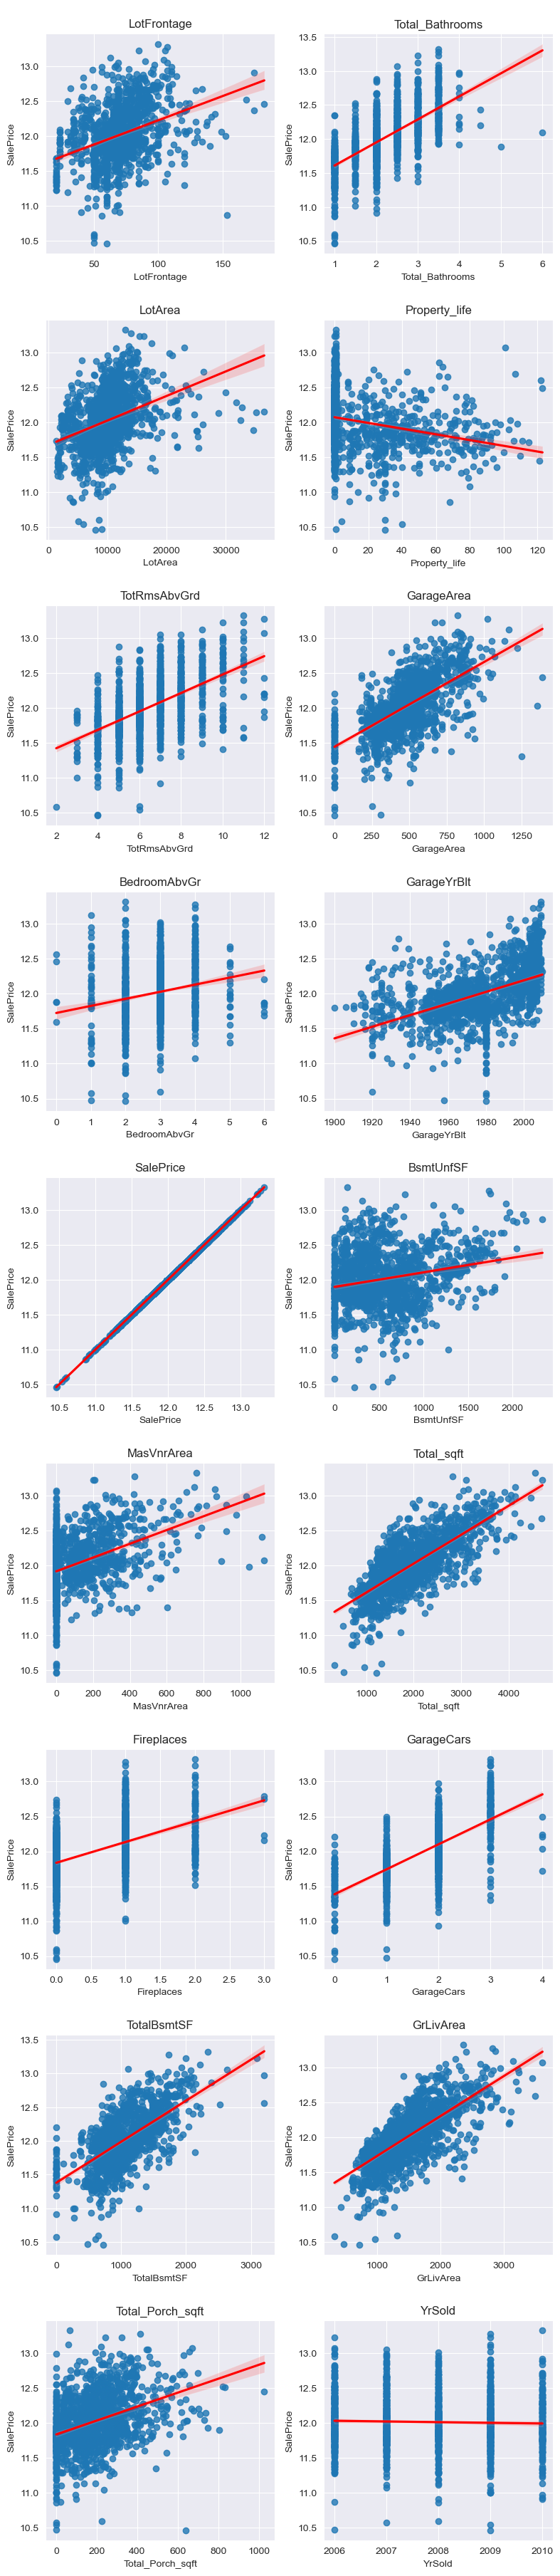

In [41]:
# Reg plot between continuous dependent variables and independent variable "cnt"

fig_cols = len(continuous_variables)
fig_rows = len(continuous_variables) + 1 // 2

plt.figure(figsize=(8, 4 * fig_rows))
sub_fig = 0

for continuous_variable in continuous_variables:
    if sub_fig < fig_cols:
        sub_fig += 1
        plt.subplot(fig_rows, 2, sub_fig)
        plt.title(f"\n{continuous_variable}")
        
    sns.regplot(
        x = house_df_2[continuous_variable],
        y = house_df_2["SalePrice"],
        line_kws={"color":"red"}
    )

plt.tight_layout()
plt.show()

#### Categorical Variables

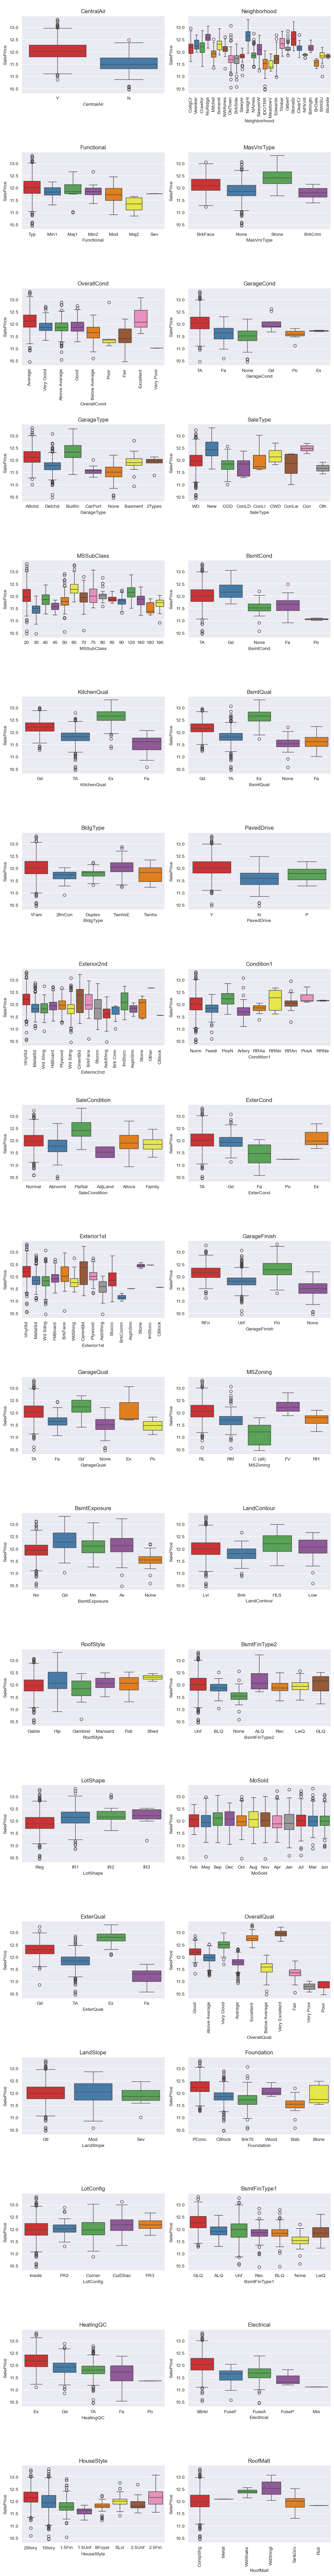

In [42]:
fig_cols = len(categorical_variables)
fig_rows = len(categorical_variables) + 1 // 2

plt.figure(figsize=(10, 4 * fig_rows))
sub_fig = 0

for categorical_variable in categorical_variables:
    sub_fig += 1
    plt.subplot(fig_rows, 2, sub_fig)
    plt.title(f"\n{categorical_variable}")
        
    sns.boxplot(data=house_df_2, x = categorical_variable, y = "SalePrice", palette = "Set1")
    if str(categorical_variable) in list(categorical_plot_config_dict.keys()):
        plt.xticks(rotation=categorical_plot_config_dict[categorical_variable]["rotation"])

plt.tight_layout()
plt.show()

#### Observations as per Bi-Variate Analysis
**The Dependent / Target Variable SalePrice is directly related with most of the continuous variables except for Property_life where it's indirectly related** <br>
**Houses having paved road access are having higher SalePrice** <br>
**Houses are having Excellent External Quality of build material are having high SalePrice** <br>
**Houses are having Excellent height of Basement are having high SalePrice** <br>
**Houses providing Centralized Air conditioning have high SalePrice** <br>

#### Multivariate Analysis

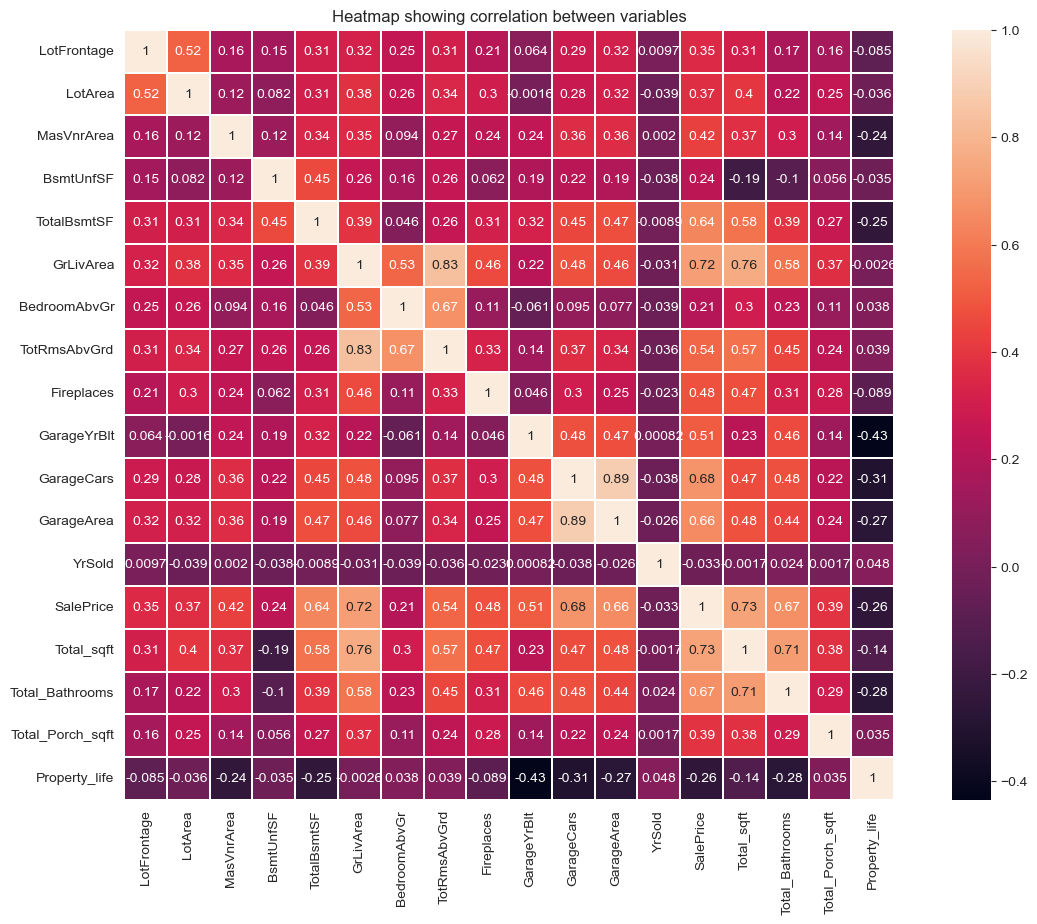

In [43]:
plt.figure(figsize=(15, 10))
sns.heatmap(house_df_2.corr(numeric_only = True), annot = True, linewidths = 0.005, square=True)

plt.title("Heatmap showing correlation between variables")
plt.show()

### Dummy Variable Creation (One Hot Encoding)

In [44]:
# Creating a copy of Model Ready Data (MRD). Here calling it pre_mrd since dummy variables are not yet created
pre_mrd = house_df_2.copy()
pre_mrd.columns = pre_mrd.columns.astype(str)
pre_mrd.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_sqft,Total_Bathrooms,Total_Porch_sqft,Property_life
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,Ex,Y,SBrkr,1710,3,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,Feb,2008,WD,Normal,12.247694,2416,3.5,61,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,Ex,Y,SBrkr,1262,3,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,May,2007,WD,Normal,12.109011,2240,2.5,298,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,Ex,Y,SBrkr,1786,3,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,Sep,2008,WD,Normal,12.317167,2272,3.5,42,1
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,Gd,Y,SBrkr,1717,3,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,Feb,2006,WD,Abnorml,11.849398,1933,2.0,307,55
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,Ex,Y,SBrkr,2198,4,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,Dec,2008,WD,Normal,12.429216,2853,3.5,276,0


In [45]:
# Create dummy variables for categorical variables where number of unique values are more than 2
require_dummies = pre_mrd[categorical_variables].nunique() > 2
dummy_vars = sorted(pre_mrd[categorical_variables].nunique()[require_dummies].index)
dummy_vars

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Condition1',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MoSold',
 'Neighborhood',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType']

In [46]:
# Final Model Ready Data (MRD)
mrd = pre_mrd.copy()

for dummy_var in dummy_vars:
    dummy_df = pd.get_dummies(
        pre_mrd[dummy_var], prefix = dummy_var, drop_first=True, dtype=int
    ) # Added dtype here since latest version of pandas returns boolean values for dummies
    mrd = pd.concat([mrd, dummy_df], axis=1).drop(columns=[dummy_var], axis=1)

# Mapping CentralAir to 1 and 0 and at present it's having values Y and N
mrd.CentralAir = mrd.CentralAir.map({"Y":1, "N":0})
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Columns: 249 entries, LotFrontage to SaleType_WD
dtypes: float64(5), int32(230), int64(14)
memory usage: 1.5 MB


#### Our Model Ready Data (MRD) has 1439 rows and 249 columns

In [47]:
mrd.head()

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice,Total_sqft,Total_Bathrooms,Total_Porch_sqft,Property_life,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,Condition1_Feedr,Condition1_Norm,Condition1_PosA,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,PavedDrive_P,PavedDrive_Y,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65.0,8450,196.0,150,856,1,1710,3,8,0,2003.0,2,548,2008,12.247694,2416,3.5,61,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0.0,284,1262,1,1262,3,6,1,1976.0,2,460,2007,12.109011,2240,2.5,298,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,68.0,11250,162.0,434,920,1,1786,3,6,1,2001.0,2,608,2008,12.317167,2272,3.5,42,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0.0,540,756,1,1717,3,7,1,1998.0,3,642,2006,11.849398,1933,2.0,307,55,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,350.0,490,1145,1,2198,4,9,1,2000.0,3,836,2008,12.429216,2853,3.5,276,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Split Datasets into train and test

In [48]:
X = mrd.copy().drop("SalePrice", axis=1)
y = mrd["SalePrice"].copy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [50]:
print(f"Shape of Independent Variables Train Dataset {X_train.shape}")
print(f"Shape of Independent Variables Test Dataset {X_test.shape}")
print(f"Shape of Dependent Variable Train Dataset {y_train.shape}")
print(f"Shape of Dependent Variable Test Dataset {y_test.shape}")

Shape of Independent Variables Train Dataset (1007, 248)
Shape of Independent Variables Test Dataset (432, 248)
Shape of Dependent Variable Train Dataset (1007,)
Shape of Dependent Variable Test Dataset (432,)


### Scaling of Data using Standardized Scaling

In [51]:
scaler = StandardScaler()

# Scaling and transforming Train Dataset
model_train = scaler.fit(X_train)
X_train_scaled = pd.DataFrame(model_train.transform(X_train), columns=X_train.columns, index=X_train.index)

# Scaling Test Dataset
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Feature Selection

In [52]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=100) # Recursive Feature Elimination to select top 100 features
rfe = rfe.fit(X_train_scaled, y_train)

In [53]:
# Observation of results
rfe_df = pd.DataFrame(
    dict(
        variable = X_train_scaled.columns,
        rfe_support = rfe.support_,
        rfe_ranking = rfe.ranking_
    )
)
rfe_df = rfe_df[rfe_df.rfe_support == True]
rfe_df

,variable,rfe_support,rfe_ranking
1,LotArea,True,1
3,BsmtUnfSF,True,1
5,CentralAir,True,1
6,GrLivArea,True,1
9,Fireplaces,True,1
12,GarageArea,True,1
14,Total_sqft,True,1
15,Total_Bathrooms,True,1
16,Total_Porch_sqft,True,1
19,BldgType_Duplex,True,1


### Modelling

In [54]:
rfe_df_cols = rfe_df.variable.values
rfe_df_cols

array(['LotArea', 'BsmtUnfSF', 'CentralAir', 'GrLivArea', 'Fireplaces',
       'GarageArea', 'Total_sqft', 'Total_Bathrooms', 'Total_Porch_sqft',
       'BldgType_Duplex', 'BsmtCond_None', 'BsmtCond_Po',
       'BsmtExposure_Gd', 'BsmtExposure_None', 'BsmtFinType1_None',
       'BsmtFinType2_None', 'BsmtQual_None', 'Condition1_Norm',
       'Electrical_Mix', 'ExterQual_Gd', 'ExterQual_TA',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Foundation_PConc',
       'Functional_Maj2', 'Functional_Sev', 'Functional_Typ',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None',
       'GarageCond_Po', 'GarageCond_TA', 'GarageFinish_None',
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_None', 'GarageQual_Po', 'GarageQual_TA',
       'GarageType_Attchd'

In [55]:
y_train_pred = rfe.predict(X_train_scaled)
y_test_pred = rfe.predict(X_test_scaled)

In [56]:
def calc_r2_score(y_true: pd.Series, y_pred:pd.Series)->float:
    """
    Helper function to return R2 score
    """

    return round(r2_score(y_true=y_true, y_pred=y_pred), 3)

In [57]:
def calc_rss(y_true: pd.Series, y_pred:pd.Series)->float:
    """
    Helper function to calculate Residual Sum of Squares (RSS)
    """

    return np.sum( (y_true - y_pred) ** 2)

In [58]:
def calc_rmse(y_true: pd.Series, y_pred:pd.Series)->float:
    """
    Helper function to calculate Root Mean Square Error (RMSE)
    """

    return np.sqrt(mean_squared_error(y_true, y_pred))

In [59]:
# Calculate R2 Score
r2_score_train_linear = calc_r2_score(y_train, y_train_pred)
r2_score_test_linear = calc_r2_score(y_test, y_test_pred)
print(f"R2 Score of train dataset: {r2_score_train_linear}")
print(f"R2 Score of test dataset: {r2_score_test_linear}")
print()

# Calculate Residual Sum of Squares (RSS) 
rss_train_linear = calc_rss(y_train, y_train_pred)
rss_test_linear = calc_rss(y_test, y_test_pred)
print(f"Residual Sum of Squares (RSS) of train dataset: {rss_train_linear}")
print(f"Residual Sum of Squares (RSS) of test dataset: {rss_test_linear}")
print()

# Calculate Residual Mean Square Error (RMSE)
rmse_train_linear = calc_rmse(y_train, y_train_pred)
rmse_test_linear = calc_rmse(y_test, y_test_pred)
print(f"Root Mean Square Error (RMSE) of train dataset: {rmse_train_linear}")
print(f"Root Mean Square Error (RMSE) of test dataset: {rmse_test_linear}")

R2 Score of train dataset: 0.94
R2 Score of test dataset: -2.2897437385512507e+21

Residual Sum of Squares (RSS) of train dataset: 9.088161405598603
Residual Sum of Squares (RSS) of test dataset: 1.5642378549023387e+23

Root Mean Square Error (RMSE) of train dataset: 0.0949999289478572
Root Mean Square Error (RMSE) of test dataset: 19028717666.7848


Since the model is giving an ***R2 score of -2.2897437385512507e+21*** on the test data, it indicates that model is performing poorly because of overfitting. Thus we need regularization.

**Regularization is a an effective Technique to reduce overfitting**. <br>
**It's achieved by two Techniques**
- ***L2 Regularization (Ridge Regression)***
- ***L1 Regularization (Lasso Regression)***

In [60]:
def plot_r2_score_vs_alpha(input_df: pd.DataFrame) -> None:
    """
    Helper function to plot R2_score against Alpha for Ridge and Lasso Regression Techniques.
    """

    plt.plot(input_df['param_alpha'], input_df['mean_train_score'], label='Train')
    plt.plot(input_df['param_alpha'], input_df['mean_test_score'], label='Test')
    
    plt.xlabel('alpha')
    plt.ylabel('R2_score')
    
    plt.xscale('log')
    plt.legend()
    plt.show()

### L1 Regularization (Lasso Regression)

In [61]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [62]:
# cross validation
lasso = Lasso()
lasso_cv = GridSearchCV(
    estimator = lasso,
    param_grid = params,
    scoring = 'neg_mean_absolute_error', 
    cv = 5,
    return_train_score = True,
    verbose = 1, n_jobs = -1
)
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Optimal alpha value for Lasso Regression
optimal_alpha = lasso_cv.best_params_['alpha']
optimal_alpha

0.001

In [64]:
# Create a lasso instance with optimal value of alpha = 0.001 as determined above
lasso = Lasso(alpha = optimal_alpha)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [65]:
# Coefficients of Lasso Regression
lasso.coef_

array([ 5.40222968e-04,  5.28939812e-06,  3.16879712e-05,  2.23657385e-04,
       -9.99022969e-05,  9.37993620e-02, -1.49163683e-05, -3.54851644e-03,
        1.37234775e-03,  2.74723069e-02,  7.22132476e-04,  2.14722811e-02,
        9.24313563e-05, -2.82351761e-04,  2.72775039e-04,  3.16968231e-02,
        9.42876672e-05, -8.93906416e-07, -0.00000000e+00, -7.60092067e-03,
       -1.97125664e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.15741540e-02,  2.81147581e-02,  0.00000000e+00,
       -3.39392865e-03, -0.00000000e+00, -0.00000000e+00,  1.46790054e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  6.84871789e-03, -0.00000000e+00, -2.17788477e-03,
       -0.00000000e+00, -1.09287584e-02, -0.00000000e+00,  3.34493024e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [66]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [67]:
# Calculate R2 Score using Lasso Regression
r2_score_train_lasso = calc_r2_score(y_train, y_train_pred)
r2_score_test_lasso = calc_r2_score(y_test, y_test_pred)
print(f"R2 Score of train dataset: {r2_score_train_lasso}")
print(f"R2 Score of test dataset: {r2_score_test_lasso}")
print()

# Calculate Residual Sum of Squares (RSS)  using Lasso Regression
rss_train_lasso = calc_rss(y_train, y_train_pred)
rss_test_lasso = calc_rss(y_test, y_test_pred)
print(f"Residual Sum of Squares (RSS) of train dataset: {rss_train_lasso}")
print(f"Residual Sum of Squares (RSS) of test dataset: {rss_test_lasso}")
print()

# Calculate Residual Mean Square Error (RMSE) using Lasso Regression
rmse_train_lasso = calc_rmse(y_train, y_train_pred)
rmse_test_lasso = calc_rmse(y_test, y_test_pred)
print(f"Root Mean Square Error (RMSE) of train dataset: {rmse_train_lasso}")
print(f"Root Mean Square Error (RMSE) of test dataset: {rmse_test_lasso}")

R2 Score of train dataset: 0.928
R2 Score of test dataset: 0.899

Residual Sum of Squares (RSS) of train dataset: 10.999570730280574
Residual Sum of Squares (RSS) of test dataset: 6.866182100419393

Root Mean Square Error (RMSE) of train dataset: 0.1045136783751678
Root Mean Square Error (RMSE) of test dataset: 0.12607117056356348


In [68]:
## Create a dataframe of lasso cross validation results
lasso_cv_results= pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.378859,0.047391,0.024408,0.006574,0.0001,{'alpha': 0.0001},-0.080172,-0.080936,-0.086805,-0.099370,-0.088336,-0.087124,0.006901,2,-0.063110,-0.063333,-0.061273,-0.058495,-0.062211,-0.061684,0.001753
1,0.423005,0.041511,0.018314,0.002335,0.001,{'alpha': 0.001},-0.072377,-0.080121,-0.086500,-0.094347,-0.082213,-0.083111,0.007248,1,-0.075359,-0.073806,-0.070719,-0.069093,-0.072413,-0.072278,0.002210
2,0.400315,0.041651,0.018277,0.003759,0.01,{'alpha': 0.01},-0.101812,-0.109961,-0.125599,-0.130182,-0.115203,-0.116551,0.010297,3,-0.115585,-0.114835,-0.109855,-0.110585,-0.112825,-0.112737,0.002256
3,0.320073,0.053272,0.014967,0.002143,0.05,{'alpha': 0.05},-0.120529,-0.121104,-0.141538,-0.143689,-0.128970,-0.131166,0.009835,4,-0.131463,-0.131744,-0.124096,-0.124237,-0.130005,-0.128309,0.003434
4,0.276835,0.092663,0.015582,0.003975,0.1,{'alpha': 0.1},-0.120658,-0.121554,-0.142069,-0.144531,-0.129867,-0.131736,0.010004,5,-0.132168,-0.132313,-0.124594,-0.124860,-0.130610,-0.128909,0.003467
5,0.179712,0.101939,0.018924,0.006541,0.2,{'alpha': 0.2},-0.120591,-0.122755,-0.143083,-0.145273,-0.130978,-0.132536,0.010142,6,-0.133383,-0.133844,-0.125873,-0.125644,-0.131541,-0.130057,0.003594
6,0.085379,0.021931,0.014193,0.002491,0.3,{'alpha': 0.3},-0.121214,-0.123709,-0.143080,-0.146089,-0.132342,-0.133287,0.009982,7,-0.134556,-0.135016,-0.126607,-0.126528,-0.132356,-0.131012,0.003739
7,0.068364,0.011567,0.015198,0.003552,0.4,{'alpha': 0.4},-0.121840,-0.124841,-0.143368,-0.146722,-0.133502,-0.134055,0.009814,8,-0.135533,-0.135690,-0.127632,-0.127328,-0.133091,-0.131855,0.003690
8,0.070951,0.029760,0.014618,0.001661,0.5,{'alpha': 0.5},-0.122606,-0.126053,-0.143583,-0.147428,-0.134676,-0.134869,0.009610,9,-0.136358,-0.136555,-0.128527,-0.128174,-0.133842,-0.132691,0.003673
9,0.052801,0.007420,0.012854,0.002507,0.6,{'alpha': 0.6},-0.123443,-0.127358,-0.143840,-0.148181,-0.135934,-0.135751,0.009401,10,-0.137178,-0.137395,-0.129501,-0.129078,-0.134645,-0.133559,0.003620


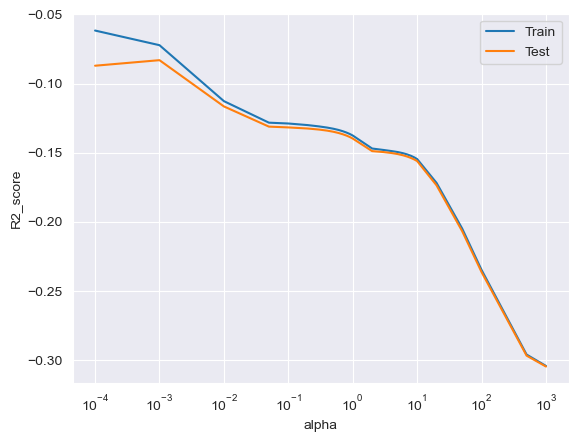

In [69]:
## Plotting R2 score vs alpha values for Lasso Regression
plot_r2_score_vs_alpha(lasso_cv_results)

***As the value of alpha increases, we see a decrease in both train and test error.***

### L2 Regularization (Ridge Regression)

In [70]:
ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(
    estimator = ridge,
    param_grid = params,
    scoring = 'neg_mean_absolute_error',
    cv = folds,
    return_train_score = True,
    verbose = 1
)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Optimal alpha value for Ridge Regression
optimal_alpha = ridge_cv.best_params_['alpha']
optimal_alpha

8.0

In [72]:
# Create a Ridge instance with optimal value of alpha = 8.0 as determined above
ridge = Ridge(alpha = optimal_alpha)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=8.0)

In [73]:
# Coefficients of Ridge Regression
ridge.coef_

array([ 4.38016514e-04,  5.60933509e-06,  1.80988933e-05,  1.60268043e-04,
       -4.09087843e-05,  7.72178650e-02,  2.93707426e-05, -3.70511182e-03,
        3.36500127e-03,  2.14941792e-02,  5.72574177e-04,  1.83154777e-02,
        7.10632261e-05, -1.34249448e-03,  2.08720510e-04,  3.48053461e-02,
        9.73078990e-05, -1.60237210e-05, -6.50498982e-03, -2.00079895e-02,
       -3.02350017e-02, -1.61937113e-02,  3.57109544e-02,  1.11983154e-03,
       -9.15910790e-03,  3.51299189e-02,  4.48607499e-02,  2.49248363e-03,
       -4.14272238e-03,  1.11983154e-03, -7.21456683e-03,  1.38127213e-02,
       -1.23179909e-02,  1.11983154e-03, -1.48246257e-02,  1.02774674e-03,
       -3.18644714e-02,  7.17084827e-03,  1.48008240e-02, -1.18823138e-02,
       -1.28493875e-02,  1.10532978e-02, -2.53561648e-02, -3.20466071e-02,
        1.11983154e-03, -3.76167074e-02,  5.51458266e-03,  3.86361925e-02,
       -2.42087346e-03,  4.39179799e-03, -2.37184112e-02, -4.73211443e-04,
       -2.96852998e-03,  

In [74]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [75]:
# Calculate R2 Score using Ridge Regression
r2_score_train_ridge = calc_r2_score(y_train, y_train_pred)
r2_score_test_ridge = calc_r2_score(y_test, y_test_pred)
print(f"R2 Score of train dataset: {r2_score_train_ridge}")
print(f"R2 Score of test dataset: {r2_score_test_ridge}")
print()

# Calculate Residual Sum of Squares (RSS)  using Ridge Regression
rss_train_ridge = calc_rss(y_train, y_train_pred)
rss_test_ridge = calc_rss(y_test, y_test_pred)
print(f"Residual Sum of Squares (RSS) of train dataset: {rss_train_ridge}")
print(f"Residual Sum of Squares (RSS) of test dataset: {rss_test_ridge}")
print()

# Calculate Residual Mean Square Error (RMSE) using Ridge Regression
rmse_train_ridge = calc_rmse(y_train, y_train_pred)
rmse_test_ridge = calc_rmse(y_test, y_test_pred)
print(f"Root Mean Square Error (RMSE) of train dataset: {rmse_train_ridge}")
print(f"Root Mean Square Error (RMSE) of test dataset: {rmse_test_ridge}")

R2 Score of train dataset: 0.94
R2 Score of test dataset: 0.903

Residual Sum of Squares (RSS) of train dataset: 9.113569257111408
Residual Sum of Squares (RSS) of test dataset: 6.593050404393135

Root Mean Square Error (RMSE) of train dataset: 0.09513263232445818
Root Mean Square Error (RMSE) of test dataset: 0.1235382157508762


In [76]:
## Create a dataframe of Ridge cross validation results
ridge_cv_results= pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010845,0.002390,0.006834,0.005304,0.0001,{'alpha': 0.0001},-0.093146,-0.091030,-0.095144,-0.108441,-0.096808,-0.096914,0.006080,26,-0.058766,-0.059710,-0.057575,-0.054900,-0.058427,-0.057876,0.001637
1,0.013788,0.004494,0.004816,0.001024,0.001,{'alpha': 0.001},-0.093032,-0.090978,-0.095124,-0.108394,-0.096812,-0.096868,0.006088,25,-0.058780,-0.059721,-0.057589,-0.054923,-0.058447,-0.057892,0.001634
2,0.014079,0.002529,0.004580,0.000983,0.01,{'alpha': 0.01},-0.092030,-0.090503,-0.094968,-0.108030,-0.096729,-0.096452,0.006185,24,-0.058924,-0.059827,-0.057719,-0.055115,-0.058616,-0.058040,0.001610
3,0.013624,0.003848,0.003712,0.000432,0.05,{'alpha': 0.05},-0.089214,-0.089299,-0.093989,-0.107276,-0.095946,-0.095145,0.006611,23,-0.059413,-0.060245,-0.058139,-0.055612,-0.059073,-0.058496,0.001592
4,0.011188,0.001262,0.005342,0.001135,0.1,{'alpha': 0.1},-0.087198,-0.088569,-0.092940,-0.106565,-0.094871,-0.094029,0.006863,22,-0.059838,-0.060636,-0.058490,-0.055936,-0.059439,-0.058868,0.001620
5,0.012677,0.000954,0.005593,0.000920,0.2,{'alpha': 0.2},-0.084812,-0.087712,-0.091572,-0.105388,-0.093224,-0.092542,0.007064,20,-0.060481,-0.061204,-0.058979,-0.056295,-0.059945,-0.059381,0.001705
6,0.010520,0.002832,0.004190,0.001711,0.3,{'alpha': 0.3},-0.083476,-0.087128,-0.090606,-0.104414,-0.092007,-0.091526,0.007090,19,-0.060972,-0.061623,-0.059420,-0.056574,-0.060355,-0.059789,0.001764
7,0.014456,0.003749,0.006329,0.000642,0.4,{'alpha': 0.4},-0.082628,-0.086666,-0.089759,-0.103646,-0.091050,-0.090750,0.007071,18,-0.061351,-0.061962,-0.059785,-0.056782,-0.060718,-0.060120,0.001818
8,0.013679,0.001948,0.006414,0.000971,0.5,{'alpha': 0.5},-0.081912,-0.086286,-0.089014,-0.102963,-0.090268,-0.090089,0.007046,17,-0.061658,-0.062217,-0.060118,-0.056956,-0.061008,-0.060391,0.001855
9,0.015744,0.002941,0.007037,0.001493,0.6,{'alpha': 0.6},-0.081285,-0.085972,-0.088365,-0.102346,-0.089604,-0.089514,0.007018,16,-0.061907,-0.062416,-0.060422,-0.057124,-0.061264,-0.060627,0.001874


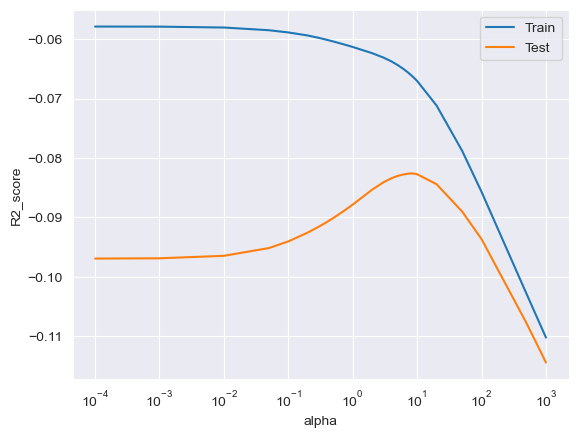

In [77]:
## Plotting R2 score vs alpha values for Ridge Regression
plot_r2_score_vs_alpha(ridge_cv_results)

***From the above graph it's clear that optimal value of alpha = 8.0***

### Model Comparison Table: Linear v/s Lasso v/s Ridge Regression

In [78]:
model_comparison_table = pd.DataFrame(
    columns = ["R2_Score_train", "R2_Score_test", "RSS_train", "RSS_test", "RMSE_train", "RMSE_test"],
    index = ["Linear_Regression", "Lasso_Regression", "Ridge_Regression"]
)
model_comparison_table.loc["Linear_Regression",:] = [r2_score_train_linear, r2_score_test_linear, rss_train_linear, rss_test_linear, rmse_train_linear, rmse_test_linear]
model_comparison_table.loc["Lasso_Regression",:] = [r2_score_train_lasso, r2_score_test_lasso, rss_train_lasso, rss_test_lasso, rmse_train_lasso, rmse_test_lasso]
model_comparison_table.loc["Ridge_Regression",:] = [r2_score_train_ridge, r2_score_test_ridge, rss_train_ridge, rss_test_ridge, rmse_train_ridge, rmse_test_ridge]

model_comparison_table

,R2_Score_train,R2_Score_test,RSS_train,RSS_test,RMSE_train,RMSE_test
Linear_Regression,0.94,-2289743738551250714624.0,9.088161,156423785490233868419072.0,0.095,19028717666.784801
Lasso_Regression,0.928,0.899,10.999571,6.866182,0.104514,0.126071
Ridge_Regression,0.94,0.903,9.113569,6.59305,0.095133,0.123538


**From the above comparison table, Lasso and Ridge regressions are giving an R2 score of approximately 90% on the test data**

### Top 5 Features using Lasso and Ridge Regression

In [79]:
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)
lasso_coefficients.sort_values(ascending = False)[:5]

SaleType_New                  0.132506
OverallQual_Excellent         0.126516
OverallQual_Very Excellent    0.117994
Neighborhood_Crawfor          0.107622
Functional_Typ                0.100549
dtype: float64

In [80]:
ridge_coefficients = pd.Series(ridge.coef_, index=X.columns).sort_values(ascending=False)
ridge_coefficients.sort_values(ascending = False)[:5]

Functional_Typ           0.092885
Neighborhood_Crawfor     0.092118
OverallQual_Very Good    0.087309
Neighborhood_StoneBr     0.080271
OverallCond_Excellent    0.077694
dtype: float64

### Inferences and Business Recommendations

- The Lasso Regression showed R2 score of 89.9% at an optimal value of alpha = 0.001
- The Ridge Regression showed R2 score of 90.3% at an optimal value of alpha = 8.0

- As per the Lasso Regresison Business Recommendation are based upon the top 5 features which indicate that Customers prefer 
    - Houses which have just been contructed and sold i.e Newly Contructed Houses.
    - Houses whose Overall material and finish of the house is Excellent to Very Excellent.
    - Houses located within Crawford Neighborhood.
    - Houses with Typical Functionalities.
 
- As per the Ridge Regresison, Business Recommendation are based upon the top 5 features which indicate that Customers prefer 
    - Houses with Typical Functionalities.
    - Houses located within Crawford or Stone Brook Neighborhood.
    - Houses whose Overall material and finish of the house is Very Good.
    - Houses whose Overall Condition is Excellent.

# Assignment Part II - Subjective Questions and Answers

#### Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Answer 1** : <br>
    Optimal alpha for Lasso = 0.001 <br>
    Optimal alpha for Ridge = 8.0

In [81]:
# Lasso Model with updated value of alpha
new_alpha_lasso = 0.002
lasso_new_alpha = Lasso(alpha = new_alpha_lasso)
lasso_new_alpha.fit(X_train, y_train)

Lasso(alpha=0.002)

In [82]:
y_train_pred = lasso_new_alpha.predict(X_train)
y_test_pred = lasso_new_alpha.predict(X_test)

In [83]:
# Calculate R2 Score using Lasso Regression with new alpha
r2_score_train_lasso_new = calc_r2_score(y_train, y_train_pred)
r2_score_test_lasso_new = calc_r2_score(y_test, y_test_pred)
print(f"R2 Score of train dataset: {r2_score_train_lasso_new}")
print(f"R2 Score of test dataset: {r2_score_test_lasso_new}")
print()

# Calculate Residual Sum of Squares (RSS) using Lasso Regression with new alpha
rss_train_lasso_new = calc_rss(y_train, y_train_pred)
rss_test_lasso_new = calc_rss(y_test, y_test_pred)
print(f"Residual Sum of Squares (RSS) of train dataset: {rss_train_lasso_new}")
print(f"Residual Sum of Squares (RSS) of test dataset: {rss_test_lasso_new}")
print()

# Calculate Residual Mean Square Error (RMSE) using Lasso Regression with new alpha
rmse_train_lasso_new = calc_rmse(y_train, y_train_pred)
rmse_test_lasso_new = calc_rmse(y_test, y_test_pred)
print(f"Root Mean Square Error (RMSE) of train dataset: {rmse_train_lasso_new}")
print(f"Root Mean Square Error (RMSE) of test dataset: {rmse_test_lasso_new}")

R2 Score of train dataset: 0.908
R2 Score of test dataset: 0.883

Residual Sum of Squares (RSS) of train dataset: 14.028533777771882
Residual Sum of Squares (RSS) of test dataset: 7.999691002048462

Root Mean Square Error (RMSE) of train dataset: 0.11802972787032881
Root Mean Square Error (RMSE) of test dataset: 0.13608013538162927


In [84]:
lasso_new_coefficients = pd.Series(lasso_new_alpha.coef_, index=X.columns).sort_values(ascending=False)
lasso_new_coefficients.sort_values(ascending = False)[:5]

SaleType_New             0.118491
CentralAir               0.100391
Functional_Typ           0.096175
Neighborhood_Crawfor     0.082931
OverallQual_Excellent    0.061243
dtype: float64

In [85]:
# Ridge Model with updated value of alpha
new_alpha_ridge = 16.0
ridge_new_alpha = Ridge(alpha = new_alpha_ridge)
ridge_new_alpha.fit(X_train, y_train)

Ridge(alpha=16.0)

In [86]:
y_train_pred = ridge_new_alpha.predict(X_train)
y_test_pred = ridge_new_alpha.predict(X_test)

In [87]:
# Calculate R2 Score  using Ridge Regression with new alpha
r2_score_train_ridge_new = calc_r2_score(y_train, y_train_pred)
r2_score_test_ridge_new = calc_r2_score(y_test, y_test_pred)
print(f"R2 Score of train dataset: {r2_score_train_ridge_new}")
print(f"R2 Score of test dataset: {r2_score_test_ridge_new}")
print()

# Calculate Residual Sum of Squares (RSS)  using Ridge Regression
rss_train_ridge_new = calc_rss(y_train, y_train_pred)
rss_test_ridge_new = calc_rss(y_test, y_test_pred)
print(f"Residual Sum of Squares (RSS) of train dataset: {rss_train_ridge_new}")
print(f"Residual Sum of Squares (RSS) of test dataset: {rss_test_ridge_new}")
print()

# Calculate Residual Mean Square Error (RMSE) using Ridge Regression
rmse_train_ridge_new = calc_rmse(y_train, y_train_pred)
rmse_test_ridge_new = calc_rmse(y_test, y_test_pred)
print(f"Root Mean Square Error (RMSE) of train dataset: {rmse_train_ridge_new}")
print(f"Root Mean Square Error (RMSE) of test dataset: {rmse_test_ridge_new}")

R2 Score of train dataset: 0.935
R2 Score of test dataset: 0.902

Residual Sum of Squares (RSS) of train dataset: 9.968173972035128
Residual Sum of Squares (RSS) of test dataset: 6.722065605149706

Root Mean Square Error (RMSE) of train dataset: 0.0994931243827384
Root Mean Square Error (RMSE) of test dataset: 0.12474108003764298


In [88]:
ridge_new_coefficients = pd.Series(ridge_new_alpha.coef_, index=X.columns).sort_values(ascending=False)
ridge_new_coefficients.sort_values(ascending = False)[:5]

Functional_Typ           0.084971
Neighborhood_Crawfor     0.078169
CentralAir               0.074009
OverallQual_Very Good    0.072914
OverallQual_Excellent    0.060674
dtype: float64

#### Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Answer 2** : The Optimal Value of Lambda determines the amount of Regularization. The More Lambda you apply, the more regularization you achieve. Thereby it gives a simpler model in general.
The Choice to choose is totally dependent upon the model you desire. For Example, if you want a smaller number of variables it can be achieved with Lasso Regression as it offers reduction in features as it sets some of the coefficient values to 0.
On the comparison Ridge Regression offers more features as it does not set the coefficients to 0 but narrows them close to 0. Thereby preventing overfitting and avoids extreme values of coefficients.

My opinion is to go with Lasso in this case. Although it’s giving me a slightly less R2 score as compared to Ridge as it makes eliminates more features and makes model simpler. That’s why I choose it.

#### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [89]:
# cross validation
lasso = Lasso()
lasso_cv = GridSearchCV(
    estimator = lasso,
    param_grid = params,
    scoring = 'neg_mean_absolute_error', 
    cv = 5,
    return_train_score = True,
    verbose = 1, n_jobs = -1
)
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Optimal alpha value for Lasso Regression
optimal_alpha = lasso_cv.best_params_['alpha']
optimal_alpha

0.001

In [91]:
top_5_features_lasso = ["SaleType_New", "OverallQual_Excellent", "OverallQual_Very Excellent", "Neighborhood_Crawfor", "Functional_Typ"]
top_5_features_lasso

['SaleType_New',
 'OverallQual_Excellent',
 'OverallQual_Very Excellent',
 'Neighborhood_Crawfor',
 'Functional_Typ']

In [92]:
# removing top 5 features of lasso from the X train and test datasets
X_train_new_lasso = X_train.drop(top_5_features_lasso, axis=1)
X_test_new_lasso = X_test.drop(top_5_features_lasso, axis=1)

In [93]:
print(X_train_new_lasso.shape)
print(X_test_new_lasso.shape)

(1007, 243)
(432, 243)


In [94]:
# Create a lasso instance with optimal value of alpha = 0.001 as determined above
lasso = Lasso(alpha = optimal_alpha)

# Fit the model on training data
lasso.fit(X_train_new_lasso, y_train)

Lasso(alpha=0.001)

In [95]:
y_train_pred_new_lasso = lasso.predict(X_train_new_lasso)
y_test_pred_new_lasso = lasso.predict(X_test_new_lasso)

In [96]:
# Calculate R2 Score using Lasso Regression
r2_score_train_new_lasso = calc_r2_score(y_train, y_train_pred_new_lasso)
r2_score_test_new_lasso = calc_r2_score(y_test, y_test_pred_new_lasso)
print(f"R2 Score of train dataset: {r2_score_train_new_lasso}")
print(f"R2 Score of test dataset: {r2_score_test_new_lasso}")

R2 Score of train dataset: 0.921
R2 Score of test dataset: 0.896


In [97]:
new_lasso_coefficients = pd.Series(lasso.coef_, index=X_train_new_lasso.columns).sort_values(ascending=False)
new_lasso_coefficients.sort_values(ascending = False)[:5]

SaleCondition_Partial    0.107068
CentralAir               0.090222
OverallCond_Excellent    0.080115
MSZoning_FV              0.077203
OverallQual_Very Good    0.065316
dtype: float64

**Answer 3** : 
The New Top 5 Predictors post dropping original top 5 features are
- SaleCondition_Partial
- CentralAir
- OverallCond_Excellent
- MSZoning_FV
- OverallQual_Very Good

#### Question 4: How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

**Answer 4** :
The model can be made more robust and generalizable by reducing Overfitting which can be achieved by Regularization by choosing optimal value of alpha. If we focus on more accuracy then there're high chances of overfitting thus the model will perform poorly on unseen test data and it won't be sustainable and generalisable. Thus, we need to ensure that our model is trained using required features only by proper analysis of data and tuned and does not overfit thereby comparable accuracy is observed on training and test data.